# Библиотеки

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import sys

np.set_printoptions(precision=3, suppress=True)
# устанавливаем точность 3 для numpy

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

import copy

from sklearn import preprocessing
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest


from flask import Flask, request, render_template

2.8.0


# Dataset

In [2]:
raw_dataset = pd.read_excel('C:/Users/badeeva_ee/Desktop/DataScience/VKR/project/data/processed/03.03_X_nup_X_bp_with_NA.xlsx')

In [3]:
# сделаем копию, чтобы изменения не влияли на оригинальный dataset
df = copy.copy(raw_dataset)# raw_dataset - это оригинал dataset
df.head()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","Модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0,4.0,57.0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,0,4.0,60.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,0,4.0,70.0,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3,0,5.0,47.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4,0,5.0,57.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


# 1.3.	Разведочный анализ данных

Методы разведочного анализа данных, которые используются для первоначального анализа.

# Гистограммы распределения каждой из переменной

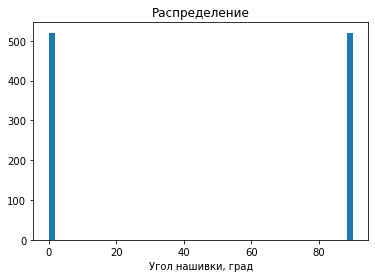

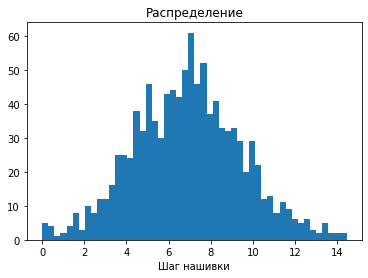

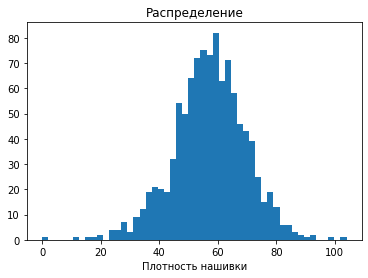

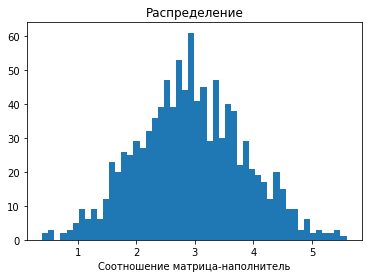

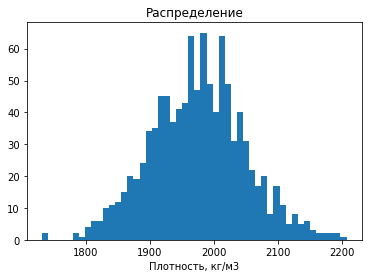

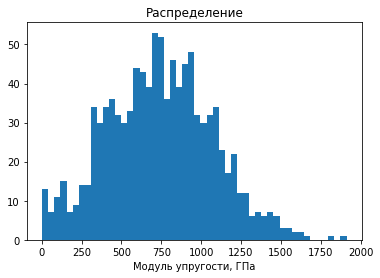

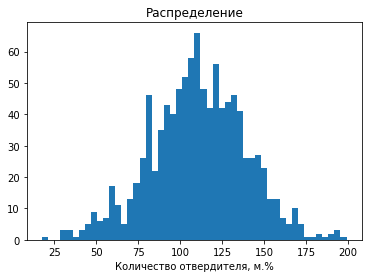

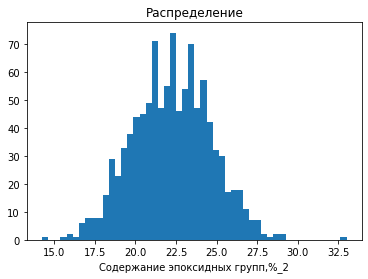

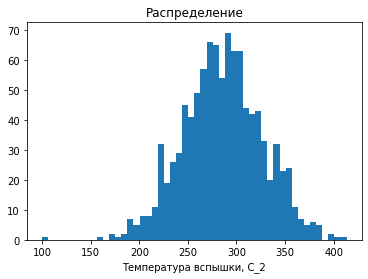

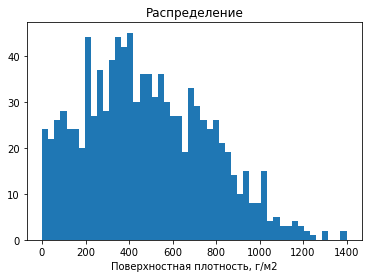

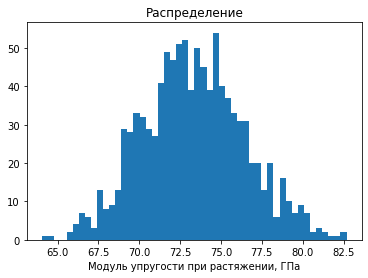

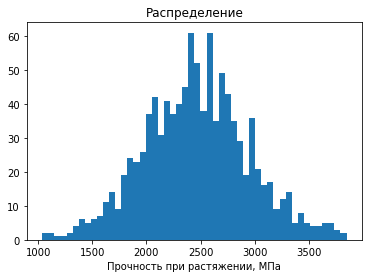

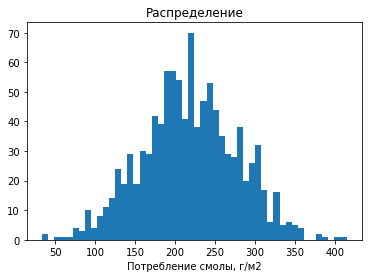

In [4]:
for col in df.columns:
    
    plt.title("Распределение")
    plt.xlabel(col)
    plt.ylabel("")
    plt.hist(df[col], bins = 50)
    plt.show()

# Диаграммы ящика с усами

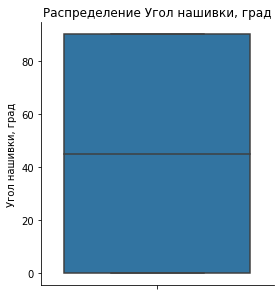

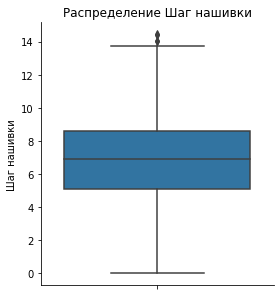

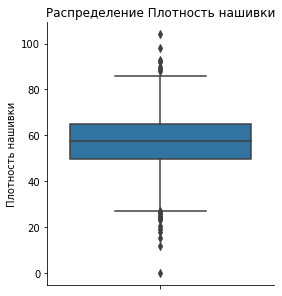

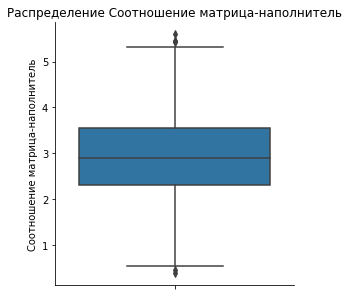

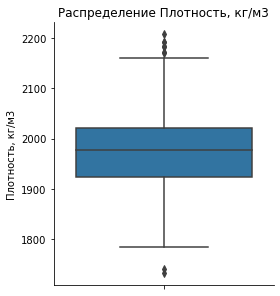

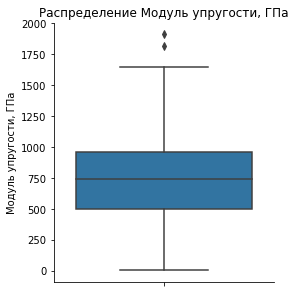

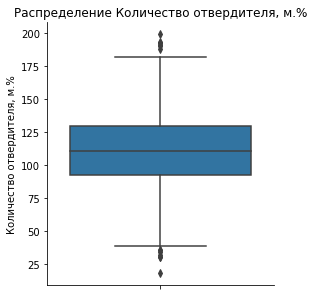

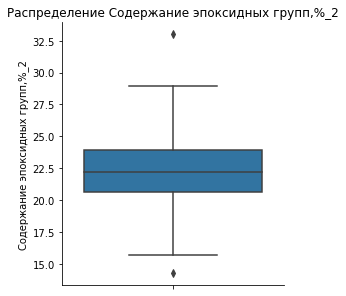

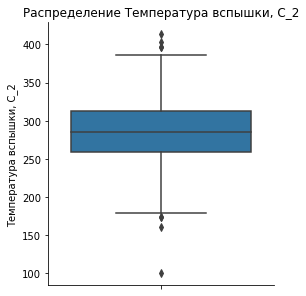

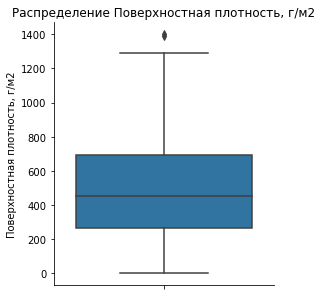

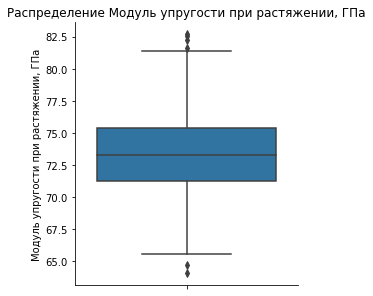

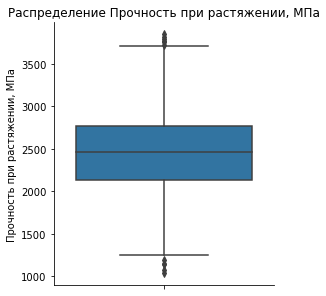

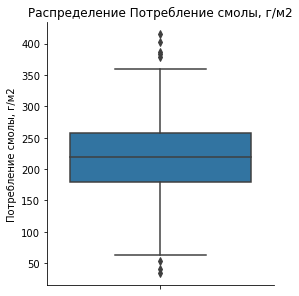

In [5]:
for col in df.columns: 
    sns.catplot(y = col, data = df, kind = 'box', height=4)
    plt.title("Распределение " + str(col))

# Анализ и исключение выбросов

In [6]:
lower_bound = df.quantile(q=0.025)
upper_bound = df.quantile(q=0.975)
df0 = df[(df < lower_bound) | (df > upper_bound)]

In [7]:
df0.describe().transpose().T

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","Модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
count,0.0,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,NaN,7.068503,55.293940,2.967925,1981.786497,789.030304,109.418280,22.316828,284.441788,592.966394,73.564198,2491.747330,217.447396
std,NaN,6.143102,31.664617,2.108366,176.226245,752.765746,68.826808,5.632034,97.741508,586.554340,7.206875,1166.441805,139.119392
min,NaN,0.000000,0.000000,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026
25%,NaN,1.260369,26.926319,0.982081,1815.501815,40.865406,44.090305,16.994940,193.865120,14.466100,66.593424,1384.826358,87.665495
50%,NaN,7.020952,56.071725,2.925796,1979.087199,759.366863,108.741368,22.207596,285.438843,547.276393,73.600128,2488.242438,215.554014
75%,NaN,13.014980,84.177275,4.968777,2146.529663,1491.783029,171.794880,27.458236,378.655181,1154.724151,80.287070,3641.278334,346.535323
max,NaN,14.440522,103.988901,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628


# Наличие пропусков

In [8]:
# провряем наличие пропусков
# False - это значит нет пропусков, True - есть пропуски
df.isna()

# считаем сумму в каждой колонке
# и видим:
# False - это 0, True - это 1
df.isna().sum()

Угол нашивки, град                       0
Шаг нашивки                              0
Плотность нашивки                        0
Соотношение матрица-наполнитель         17
Плотность, кг/м3                        17
Модуль упругости, ГПа                   17
Количество отвердителя, м.%             17
Содержание эпоксидных групп,%_2         17
Температура вспышки, С_2                17
Поверхностная плотность, г/м2           17
Модуль упругости при растяжении, ГПа    17
Прочность при растяжении, МПа           17
Потребление смолы, г/м2                 17
dtype: int64

In [9]:
df.shape

(1040, 13)

# Среднее и медианное значение

In [10]:
df.describe().transpose()[['mean', '50%']]
# медиана - число, которое находится в середине этого набора

,mean,50%
"Угол нашивки, град",45.000000,45.000000
Шаг нашивки,6.911385,6.938000
Плотность нашивки,57.248399,57.413594
Соотношение матрица-наполнитель,2.930366,2.906878
"Плотность, кг/м3",1975.734888,1977.621657
"Модуль упругости, ГПа",739.923233,739.664328
"Количество отвердителя, м.%",110.570769,110.564840
"Содержание эпоксидных групп,%_2",22.244390,22.230744
"Температура вспышки, С_2",285.882151,285.896812
"Поверхностная плотность, г/м2",482.731833,451.864365


# Попарные графики рассеяния точек

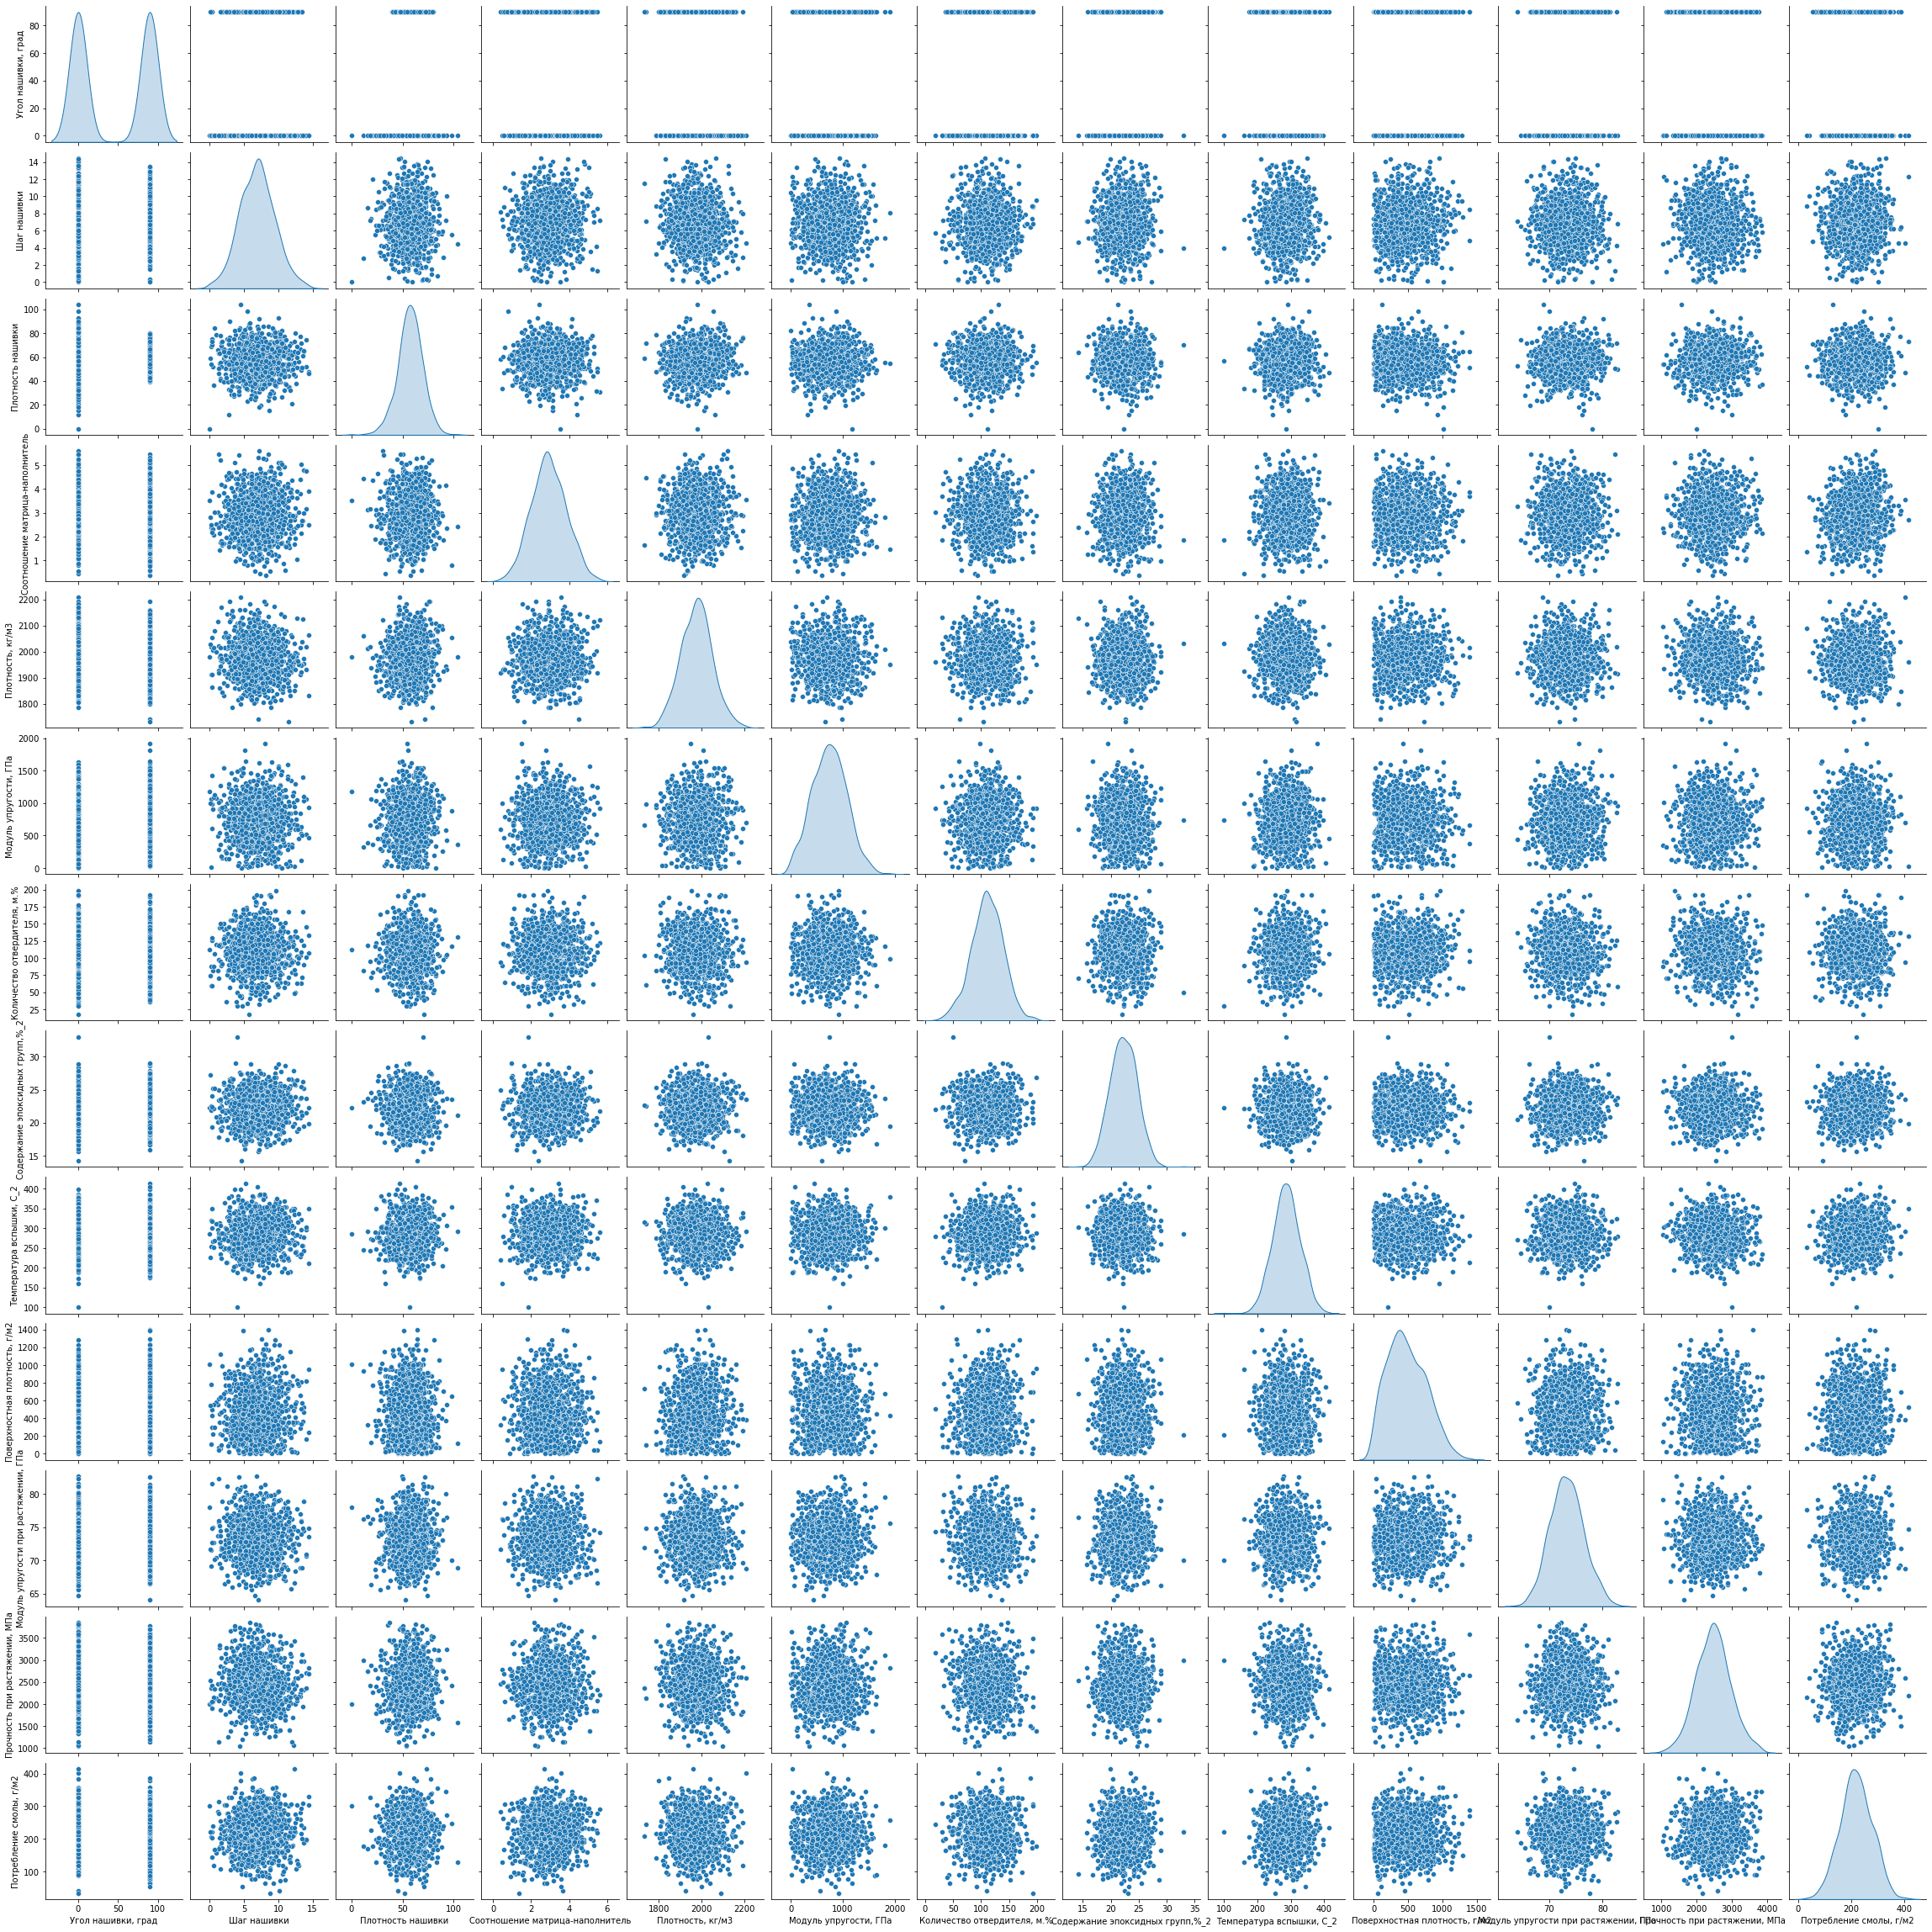

In [11]:
sns.pairplot(df[df.columns],
    diag_kind='kde');
# kde - это построение с помощью ядер оценки плотности распределения
# kde будет по диагонали

# Корреляция

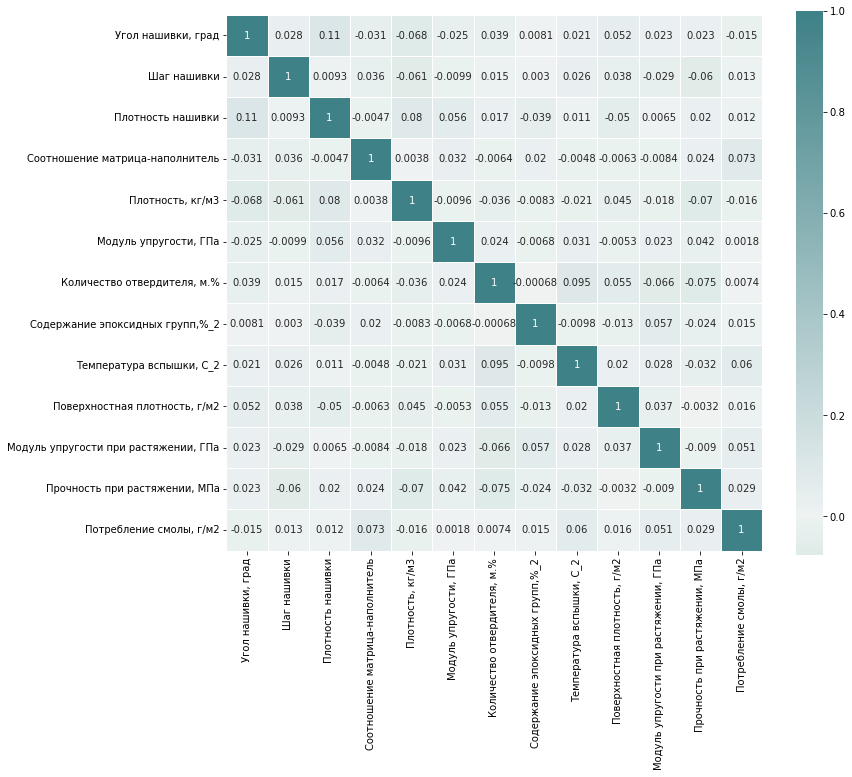

In [12]:
corr = df.corr()

# Создаем полотно для отображения графика
f, ax = plt.subplots(figsize = (12, 10))

# Создаем цветовую политру
cmap = sns.diverging_palette(170, 200, as_cmap=True)

# Визуализируем данные кореляции
sns.heatmap( corr, ax = ax, cmap = cmap, linewidths = 0.5, annot = True, center = 0, square = True);

# 2.	Практическая часть

In [13]:
# сделаем копию, чтобы изменения не влияли на оригинальный dataset
df2 = copy.copy(df)
df2.head()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","Модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0,4.0,57.0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,0,4.0,60.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,0,4.0,70.0,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3,0,5.0,47.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4,0,5.0,57.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


# 2.1.	Предобработка данных 

В данном разделе приводятся графики распределения для каждого признака до и после нормализации, указаны максимальные и минимальные значения. 

# Удаление шумов

# Удаление пропусков

In [14]:
df2 = df2.dropna()
df2.isna().sum() # теперь пропусков нет

Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
Модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
dtype: int64

In [15]:
df2.shape

(1023, 13)

# Нормализация

In [16]:
min_max_scaler = preprocessing.MinMaxScaler()
df3 = pd.DataFrame(min_max_scaler.fit_transform(df2),
    columns = df2.columns,
    index = df2.index)
df3

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","Модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0.0,0.276998,0.548135,0.282131,0.626533,0.385679,0.067654,0.427467,0.000000,0.149682,0.319194,0.698235,0.488979
1,0.0,0.276998,0.576985,0.282131,0.626533,0.385679,0.178021,0.506535,0.589311,0.149682,0.319194,0.698235,0.488979
2,0.0,0.276998,0.673149,0.282131,0.626533,0.385679,0.177469,1.000000,0.589311,0.149682,0.319194,0.698235,0.488979
3,0.0,0.346248,0.451971,0.282131,0.626533,0.385679,0.613972,0.373167,0.638420,0.149682,0.319194,0.698235,0.488979
4,0.0,0.346248,0.548135,0.457857,0.626533,0.393150,0.519387,0.427467,0.589311,0.149682,0.319194,0.698235,0.488979
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,1.0,0.628535,0.452161,0.361750,0.462855,0.476884,0.382158,0.313057,0.717503,0.149109,0.485125,0.480312,0.239516
1019,1.0,0.731664,0.516890,0.587163,0.668737,0.231678,0.707685,0.285131,0.492271,0.250230,0.475992,0.470745,0.220404
1020,1.0,0.288158,0.650355,0.555750,0.505470,0.217065,0.512067,0.517605,0.473781,0.528643,0.573346,0.578340,0.532590
1021,1.0,0.437186,0.560262,0.637396,0.703842,0.387114,0.682389,0.266309,0.561107,0.458108,0.536217,0.368070,0.428909


# Графики распределения для каждого признака после нормализации

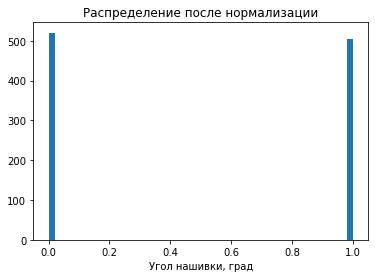

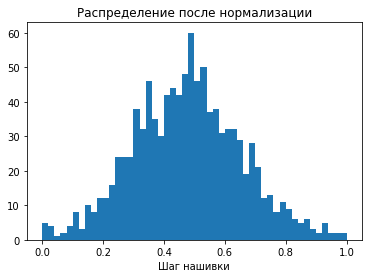

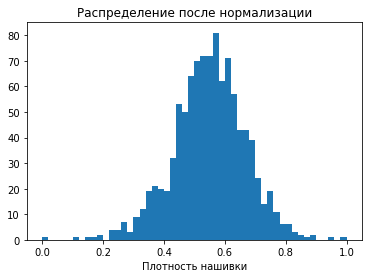

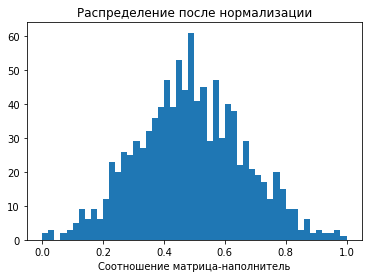

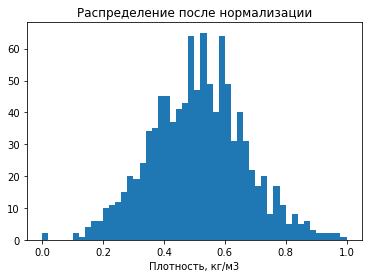

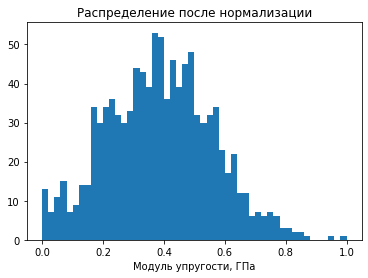

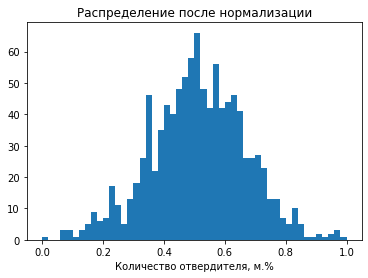

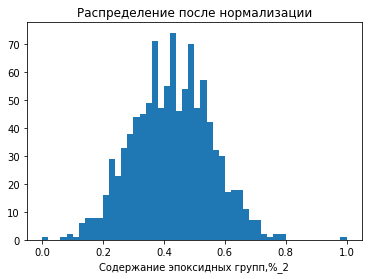

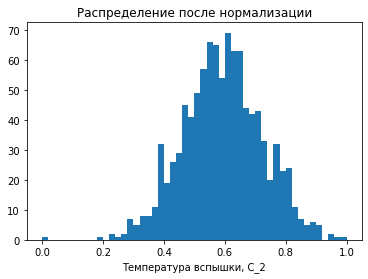

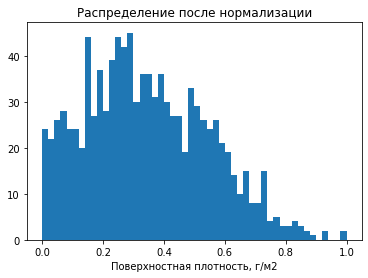

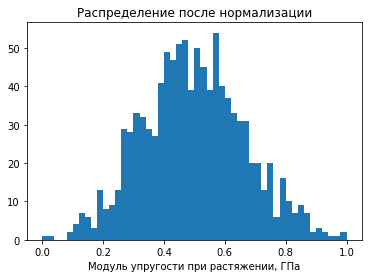

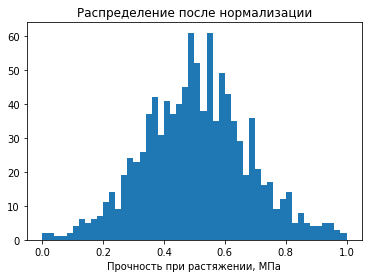

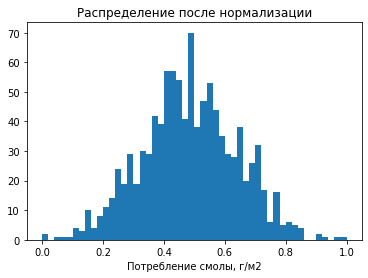

In [17]:
for col in df3.columns:
    
    plt.title("Распределение после нормализации")
    plt.xlabel(col)
    plt.ylabel("")
    plt.hist(df3[col], bins = 50)
    plt.show()

In [18]:
df3.describe().transpose().T

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","Модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,0.491691,0.477768,0.549616,0.488427,0.512533,0.386301,0.512273,0.426215,0.593354,0.344638,0.497880,0.508634,0.484838
std,0.500175,0.177519,0.118772,0.175541,0.154890,0.172978,0.156147,0.128370,0.130695,0.201092,0.167435,0.172724,0.156875
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.351790,0.478890,0.370696,0.404175,0.260652,0.412240,0.338919,0.507756,0.190296,0.386030,0.390881,0.382955
50%,0.000000,0.478940,0.551423,0.483912,0.516497,0.386165,0.512240,0.425487,0.593401,0.322574,0.494672,0.506003,0.486875
75%,1.000000,0.594597,0.624537,0.608045,0.608413,0.502528,0.618003,0.517842,0.679924,0.495105,0.606751,0.615432,0.587411
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Стандартизация

In [19]:
s_scaler = preprocessing.StandardScaler()
df4 = pd.DataFrame(s_scaler.fit_transform(df2),
    columns = df2.columns,
    index = df2.index)
df4

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","Модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,-0.983518,-1.131530,-0.012469,-1.175779,0.736365,-0.003594,-2.848828,0.009757,-4.542215,-0.969964,-1.067720,1.098244,0.026410
1,-0.983518,-1.131530,0.230546,-1.175779,0.736365,-0.003594,-2.141666,0.626001,-0.030955,-0.969964,-1.067720,1.098244,0.026410
2,-0.983518,-1.131530,1.040595,-1.175779,0.736365,-0.003594,-2.145202,4.471955,-0.030955,-0.969964,-1.067720,1.098244,0.026410
3,-0.983518,-0.741243,-0.822518,-1.175779,0.736365,-0.003594,0.651622,-0.413446,0.344984,-0.969964,-1.067720,1.098244,0.026410
4,-0.983518,-0.741243,-0.012469,-0.174232,0.736365,0.039618,0.045585,0.009757,-0.030955,-0.969964,-1.067720,1.098244,0.026410
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,1.016758,0.849718,-0.820917,-0.721995,-0.320884,0.523926,-0.833694,-0.881925,0.950375,-0.972814,-0.076219,-0.164054,-1.564572
1019,1.016758,1.430947,-0.275671,0.562741,1.008971,-0.894327,1.252072,-1.099577,-0.773808,-0.469707,-0.130794,-0.219473,-1.686461
1020,1.016758,-1.068634,0.848588,0.383707,-0.045622,-0.978843,-0.001319,0.712276,-0.915350,0.915476,0.450935,0.403764,0.304549
1021,1.016758,-0.228717,0.089684,0.849043,1.235730,0.004703,1.089990,-1.246274,-0.246860,0.564542,0.229077,-0.814204,-0.356695


# Графики распределения для каждого признака после стандартизации

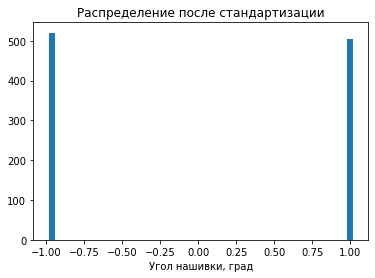

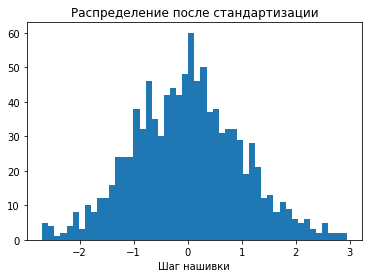

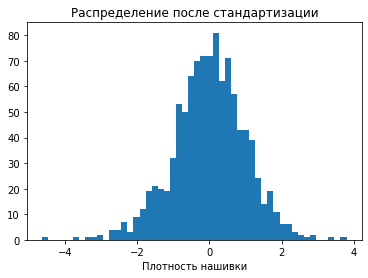

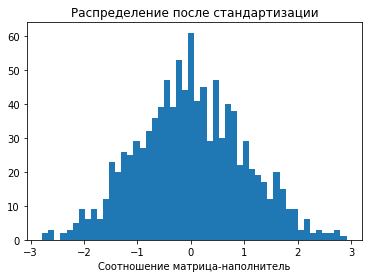

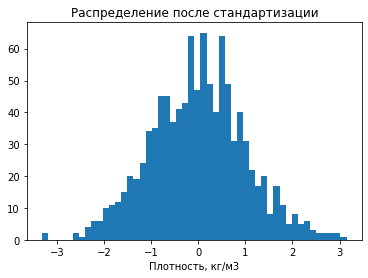

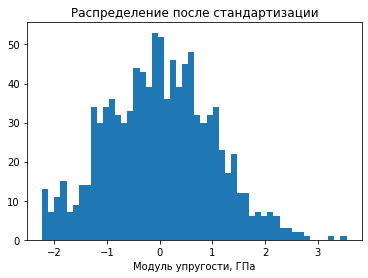

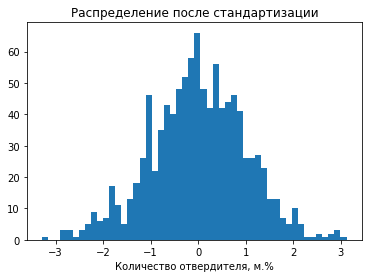

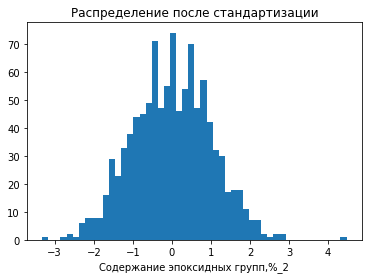

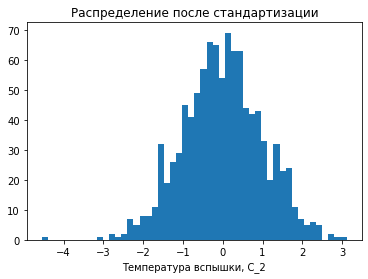

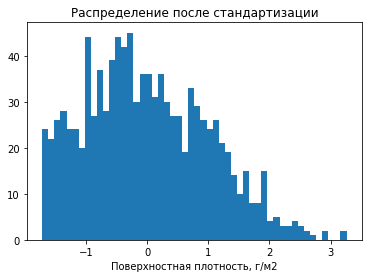

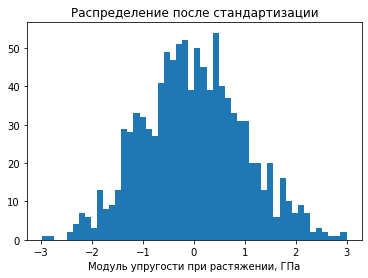

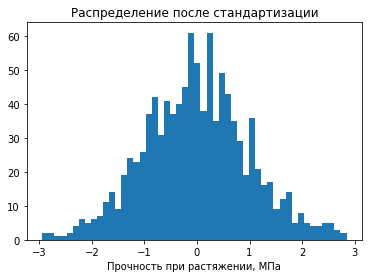

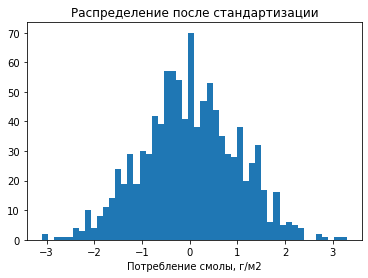

In [20]:
for col in df4.columns:
    
    plt.title("Распределение после стандартизации")
    plt.xlabel(col)
    plt.ylabel("")
    plt.hist(df4[col], bins = 50)
    plt.show()

# 2.2.	Разработка и обучение модели

В данной части приводится список моделей, которые будут использоваться для прогноза модуля упругости при растяжении и прочности при растяжении.

Тестовая часть 30%.

In [21]:
# объявим словать test_results
# получился словарь из модели и того, что нужно предсказать
test_results = {}

In [22]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Угол нашивки, град                    1023 non-null   float64
 1   Шаг нашивки                           1023 non-null   float64
 2   Плотность нашивки                     1023 non-null   float64
 3   Соотношение матрица-наполнитель       1023 non-null   float64
 4   Плотность, кг/м3                      1023 non-null   float64
 5   Модуль упругости, ГПа                 1023 non-null   float64
 6   Количество отвердителя, м.%           1023 non-null   float64
 7   Содержание эпоксидных групп,%_2       1023 non-null   float64
 8   Температура вспышки, С_2              1023 non-null   float64
 9   Поверхностная плотность, г/м2         1023 non-null   float64
 10  Модуль упругости при растяжении, ГПа  1023 non-null   float64
 11  Прочность при рас

In [23]:
# создаем копию
X = copy.copy(df4)
# удаляем из копии колонку, которую будем предсказывать
y_m = X.pop('Модуль упругости при растяжении, ГПа')
y = X.pop('Прочность при растяжении, МПа')

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Угол нашивки, град               1023 non-null   float64
 1   Шаг нашивки                      1023 non-null   float64
 2   Плотность нашивки                1023 non-null   float64
 3   Соотношение матрица-наполнитель  1023 non-null   float64
 4   Плотность, кг/м3                 1023 non-null   float64
 5   Модуль упругости, ГПа            1023 non-null   float64
 6   Количество отвердителя, м.%      1023 non-null   float64
 7   Содержание эпоксидных групп,%_2  1023 non-null   float64
 8   Температура вспышки, С_2         1023 non-null   float64
 9   Поверхностная плотность, г/м2    1023 non-null   float64
 10  Потребление смолы, г/м2          1023 non-null   float64
dtypes: float64(11)
memory usage: 95.9 KB


In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

# Линейная регрессия

In [26]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X))
print(normalizer.mean.numpy())

[[ 0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0.]]


In [27]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=2)
])

In [28]:
linear_model.predict(X_train[:10])

array([[-0.211, -1.208],
       [-1.259,  1.977],
       [ 0.582,  0.069],
       [ 0.319,  1.005],
       [ 0.4  , -1.251],
       [-0.091,  1.215],
       [ 0.19 , -0.085],
       [ 1.583,  0.803],
       [ 0.193,  0.04 ],
       [ 0.601,  0.753]], dtype=float32)

In [29]:
y_train[:10]

479    1.727195
341   -1.709628
743   -0.560190
685   -0.065612
919   -1.030834
823   -0.355713
755   -0.245654
584   -1.165247
307   -0.940109
865   -0.992311
Name: Прочность при растяжении, МПа, dtype: float64

In [30]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [31]:
%%time
history = linear_model.fit(
    X_train,
    y_train,
    epochs=50,
    verbose=1,
    validation_split = 0.2)

Epoch 1/50
18/18 [==============================] - 1s 11ms/step - loss: 0.9332 - val_loss: 0.9127
Epoch 2/50
18/18 [==============================] - 0s 3ms/step - loss: 0.8013 - val_loss: 0.8291
Epoch 3/50
18/18 [==============================] - 0s 3ms/step - loss: 0.7880 - val_loss: 0.9034
Epoch 4/50
18/18 [==============================] - 0s 3ms/step - loss: 0.7955 - val_loss: 0.8190
Epoch 5/50
18/18 [==============================] - 0s 4ms/step - loss: 0.7863 - val_loss: 0.8595
Epoch 6/50
18/18 [==============================] - 0s 4ms/step - loss: 0.7908 - val_loss: 0.8181
Epoch 7/50
18/18 [==============================] - 0s 4ms/step - loss: 0.8076 - val_loss: 0.8526
Epoch 8/50
18/18 [==============================] - 0s 4ms/step - loss: 0.7759 - val_loss: 0.8175
Epoch 9/50
18/18 [==============================] - 0s 4ms/step - loss: 0.7685 - val_loss: 0.8394
Epoch 10/50
18/18 [==============================] - 0s 4ms/step - loss: 0.7945 - val_loss: 0.8336
Epoch 11/50
18/18 

In [32]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Эпоха')
    plt.ylabel('MAE')
    plt.legend()
    plt.grid(True)

0.8780460953712463

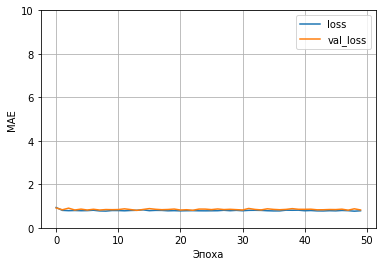

In [33]:
plot_loss(history)
linear_model.evaluate(X_test, y_test, verbose=0)

# Многослойный персептрон

In [34]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(40, activation='relu'),
      layers.Dense(40, activation='relu'),
      layers.Dense(2)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [35]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 11)               23        
 n)                                                              
                                                                 
 dense_1 (Dense)             (None, 40)                480       
                                                                 
 dense_2 (Dense)             (None, 40)                1640      
                                                                 
 dense_3 (Dense)             (None, 2)                 82        
                                                                 
Total params: 2,225
Trainable params: 2,202
Non-trainable params: 23
_________________________________________________________________


Wall time: 3.82 s


0.954053521156311

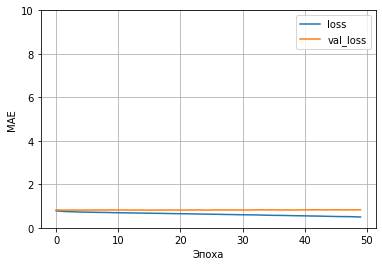

In [36]:
%%time
history = dnn_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=50)
plot_loss(history)
dnn_model.evaluate(X_test, y_test, verbose=0)

# Эксперименты с моделями

Добавлен слой.
Добавлен dropout
Активационная функция - sigmoid.
Оптимайзер - RMSprop.

In [37]:
# создаем копию
X2 = copy.copy(df3)
# удаляем из копии колонку, которую будем предсказывать
y_m2 = X2.pop('Модуль упругости при растяжении, ГПа')
y2 = X2.pop('Прочность при растяжении, МПа')

In [38]:
normalizer2 = tf.keras.layers.Normalization(axis=-1)
normalizer2.adapt(np.array(X2))
print(normalizer2.mean.numpy())

[[0.492 0.478 0.55  0.488 0.513 0.386 0.512 0.426 0.593 0.345 0.485]]


In [39]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.3, random_state=1)

In [40]:
def build_and_compile_model(norm):
    model2 = keras.Sequential([
      norm,
      layers.Dense(200, activation='sigmoid'),
        layers.Dropout(0.6),
      layers.Dense(20, activation='sigmoid'),
      layers.Dense(10, activation='sigmoid'),
      layers.Dense(2)
    ])

    model2.compile(
        loss='mean_absolute_error',
        optimizer=tf.keras.optimizers.RMSprop(0.001),
        #metrics=['accuracy']
        #metrics=['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'cosine_proximity']
    )
    return model2

dnn_model2 = build_and_compile_model(normalizer2)
dnn_model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 11)               23        
 ion)                                                            
                                                                 
 dense_4 (Dense)             (None, 200)               2400      
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_5 (Dense)             (None, 20)                4020      
                                                                 
 dense_6 (Dense)             (None, 10)                210       
                                                                 
 dense_7 (Dense)             (None, 2)                 22        
                                                      

Epoch 1/50
18/18 [==============================] - 1s 12ms/step - loss: 0.4832 - val_loss: 0.3384
Epoch 2/50
18/18 [==============================] - 0s 6ms/step - loss: 0.2691 - val_loss: 0.2067
Epoch 3/50
18/18 [==============================] - 0s 5ms/step - loss: 0.1647 - val_loss: 0.1446
Epoch 4/50
18/18 [==============================] - 0s 5ms/step - loss: 0.1321 - val_loss: 0.1379
Epoch 5/50
18/18 [==============================] - 0s 5ms/step - loss: 0.1311 - val_loss: 0.1367
Epoch 6/50
18/18 [==============================] - 0s 5ms/step - loss: 0.1300 - val_loss: 0.1369
Epoch 7/50
18/18 [==============================] - 0s 5ms/step - loss: 0.1309 - val_loss: 0.1368
Epoch 8/50
18/18 [==============================] - 0s 5ms/step - loss: 0.1304 - val_loss: 0.1374
Epoch 9/50
18/18 [==============================] - 0s 5ms/step - loss: 0.1303 - val_loss: 0.1368
Epoch 10/50
18/18 [==============================] - 0s 5ms/step - loss: 0.1305 - val_loss: 0.1366
Epoch 11/50
18/18 

0.14972466230392456

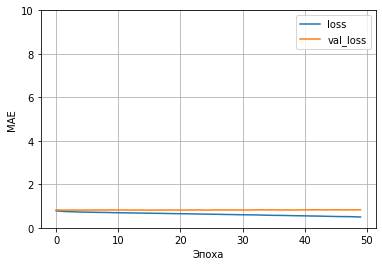

In [41]:
%%time
history2 = dnn_model2.fit(
    X_train2,
    y_train2,
    validation_split = 0.2,
    verbose=1, epochs=50)
plot_loss(history)
dnn_model2.evaluate(X_test2, y_test2, verbose=0)

# Поиск гиперпараметров

При построении моделей провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.
Ten-Fold-Cross Validation

In [1]:
# создаем словарь параметров
param_grid = {
    'optimizer': ['RMSprop', 'Adam', 'Adamax', 'Adagrad'],
    'activation': ['sigmoid', 'relu', 'leaky_relu']
    }

# 2.3.	Тестирование модели

В данном разделе показывается ошибка каждой модели на тренировочной и тестовой части выборки. Обосновывается выбор модели.

In [44]:
test_results ['linear_model'] = linear_model.evaluate(X_test, y_test, verbose=0)
test_results ['dnn_model'] = dnn_model.evaluate(X_test, y_test, verbose=0)
test_results ['dnn_model2'] = dnn_model2.evaluate(X_test2, y_test2, verbose=0)


In [45]:
pd.DataFrame(test_results, index=['Mean absolute error']).T

,Mean absolute error
linear_model,0.878046
dnn_model,0.954054
dnn_model2,0.149725


# 2.4.	Нейронная сеть, которая будет рекомендовать соотношение матрица-наполнитель 

Описывается выбранная архитектура нейронной сети и ее результаты.

Оценка точности модели на тренировочном и тестовом датасете. 

In [46]:
X3 = copy.copy(df3)
# удаляем из копии колонку, которую будем предсказывать
y3 = X3.pop('Соотношение матрица-наполнитель')
X3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Угол нашивки, град                    1023 non-null   float64
 1   Шаг нашивки                           1023 non-null   float64
 2   Плотность нашивки                     1023 non-null   float64
 3   Плотность, кг/м3                      1023 non-null   float64
 4   Модуль упругости, ГПа                 1023 non-null   float64
 5   Количество отвердителя, м.%           1023 non-null   float64
 6   Содержание эпоксидных групп,%_2       1023 non-null   float64
 7   Температура вспышки, С_2              1023 non-null   float64
 8   Поверхностная плотность, г/м2         1023 non-null   float64
 9   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 10  Прочность при растяжении, МПа         1023 non-null   float64
 11  Потребление смолы

In [47]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X3, y3, test_size=0.3, random_state=1)

In [48]:
normalizer3 = tf.keras.layers.Normalization(axis=-1)
normalizer3.adapt(np.array(X3))
print(normalizer3.mean.numpy())

[[0.492 0.478 0.55  0.513 0.386 0.512 0.426 0.593 0.345 0.498 0.509 0.485]]


In [49]:
def build_and_compile_model(norm):
    model3 = keras.Sequential([
      norm,
      layers.Dense(200, activation='sigmoid'),
        layers.Dropout(0.6),
      layers.Dense(20, activation='sigmoid'),
      layers.Dense(10, activation='sigmoid'),
      layers.Dense(1)
    ])

    model3.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.RMSprop(0.001))
    return model3

dnn_model3 = build_and_compile_model(normalizer3)
dnn_model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 12)               25        
 ion)                                                            
                                                                 
 dense_8 (Dense)             (None, 200)               2600      
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_9 (Dense)             (None, 20)                4020      
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                      

Wall time: 4.45 s


0.14491954445838928

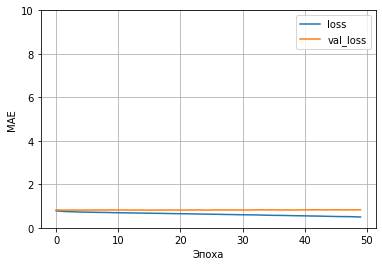

In [50]:
%%time
history3 = dnn_model3.fit(
    X_train3,
    y_train3,
    validation_split = 0.2,
    verbose=0, epochs=50)
plot_loss(history)
dnn_model3.evaluate(X_test3, y_test3, verbose=0)

In [51]:
# сохранение модели
dnn_model3.save(
    "C:/Users/badeeva_ee/Desktop/DataScience/VKR/project/model/model_perceptron_for_app")

INFO:tensorflow:Assets written to: C:/Users/badeeva_ee/Desktop/DataScience/VKR/project/model/model_perceptron_for_app\assets
